<a href="https://colab.research.google.com/github/nhatboi154/AI/blob/main/bai1AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
from keras.utils import np_utils 
from keras.datasets import fashion_mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  

In [ ]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])

Epoch 1/500
375/375 [==============================] - 5s 4ms/step - loss: 0.5862 - accuracy: 0.7880 - val_loss: 0.4676 - val_accuracy: 0.8279
Epoch 2/500
375/375 [==============================] - 1s 4ms/step - loss: 0.4125 - accuracy: 0.8482 - val_loss: 0.4430 - val_accuracy: 0.8335
Epoch 3/500
375/375 [==============================] - 1s 3ms/step - loss: 0.3768 - accuracy: 0.8624 - val_loss: 0.3994 - val_accuracy: 0.8500
Epoch 4/500
375/375 [==============================] - 1s 4ms/step - loss: 0.3537 - accuracy: 0.8720 - val_loss: 0.3672 - val_accuracy: 0.8768
Epoch 5/500
375/375 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8774 - val_loss: 0.3483 - val_accuracy: 0.8784
Epoch 6/500
375/375 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8812 - val_loss: 0.3534 - val_accuracy: 0.8781
Epoch 7/500
375/375 [==============================] - 1s 4ms/step - loss: 0.3209 - accuracy: 0.8831 - val_loss: 0.3497 - val_accuracy: 0.8823

Sai số kiểm tra là:  1.1979269981384277
Độ chính xác kiểm tra là:  0.888700008392334


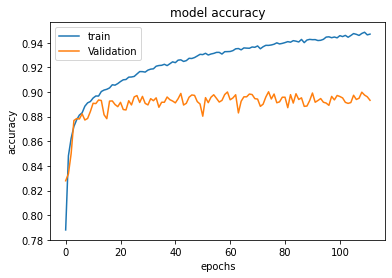

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()